# BPM Model Results

In [465]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

mainDir = '/Users/rachelanderson/Desktop/Research/Anderson_TermPaper_515'
gammaDir = mainDir + '/Data/Gamma/'
Zdir = mainDir + '/Data/Ztrue/'
outputDir = mainDir + '/Data/bpmGibbsOutput/'
figDir = mainDir + '/Figures/bpm/nM10/'

In [475]:
ext = 'nM9_L3'
df = pd.read_csv(outputDir + 'trace_' + ext + '.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

N = len(df)
burnIn = 5000
df_burnt = df[burnIn:N]
df_burnt.head()

,pM,pML_1,pML_2,pML_3,pUL_1,pUL_2,pUL_3,llh
5000,0.196486,0.656075,0.408326,0.383672,0.169650,0.276162,0.212848,-174.172564
5001,0.326654,0.213116,0.130914,0.096528,0.261634,0.310116,0.282726,-171.099424
5002,0.536095,0.679631,0.171837,0.394379,0.316417,0.277325,0.243058,-174.170770
5003,0.105243,0.957904,0.356221,0.921999,0.223495,0.259096,0.271070,-168.992877
5004,0.075524,0.894420,0.800455,0.736615,0.193065,0.295504,0.249851,-166.244244


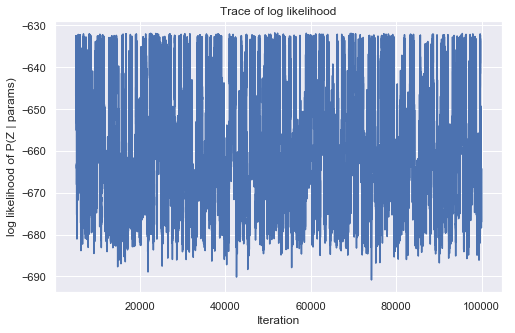

In [464]:
sns.set(rc={'figure.figsize':(8,5)})
plt.plot(df_burnt['llh'])
plt.title('Trace of log likelihood')
plt.xlabel('Iteration')
plt.ylabel('log likelihood of P(Z | params)')

### Did the chain converge?
#### $m-$ probabilities

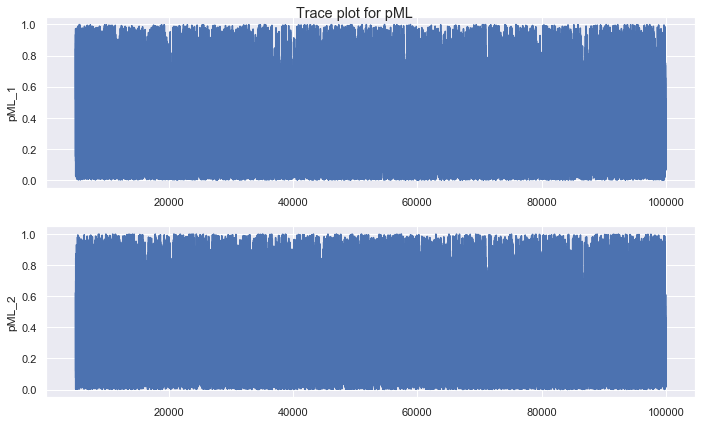

In [447]:
plt.figure(1, figsize=(10, 6))

plt.subplot(211)
plt.plot(df_burnt[['pML_1']])
plt.ylabel('pML_1')

plt.subplot(212)
plt.plot(df_burnt[['pML_2']])
plt.ylabel('pML_2')

# plt.subplot(513)
# plt.plot(df_burnt[['pML_3']])
# plt.ylabel('pML_3')

# plt.subplot(514)
# plt.plot(df_burnt[['pML_4']])
# plt.ylabel('pML_4')

# plt.subplot(515)
# plt.plot(df_burnt[['pML_5']])
# plt.ylabel('pML_5')

plt.suptitle('Trace plot for pML')
plt.tight_layout()
plt.savefig(figDir + 'traceML_' + ext + '.png')
plt.show()

## $u$- probabilities

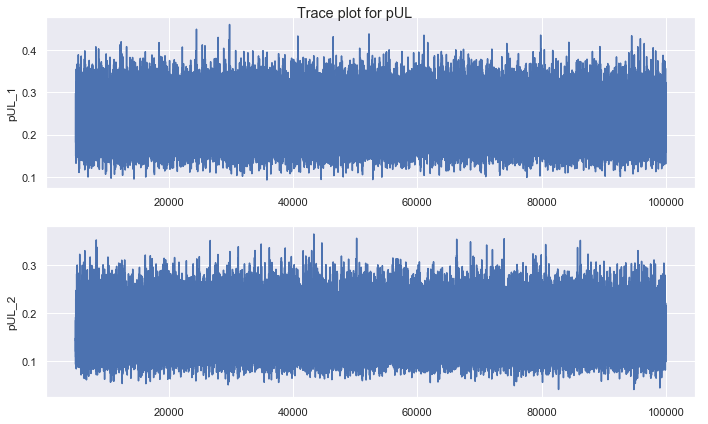

In [454]:
plt.figure(1, figsize=(10, 6))

plt.subplot(211)
plt.plot(df_burnt[['pUL_1']])
plt.ylabel('pUL_1')

plt.subplot(212)
plt.plot(df_burnt[['pUL_2']])
plt.ylabel('pUL_2')

# plt.subplot(513)
# plt.plot(df_burnt[['pUL_3']])
# plt.ylabel('pUL_3')

# plt.subplot(514)
# plt.plot(df_burnt[['pUL_4']])
# plt.ylabel('pUL_4')

# plt.subplot(515)
# plt.plot(df_burnt[['pUL_5']])
# plt.ylabel('pUL_5')

plt.suptitle('Trace plot for pUL')
plt.tight_layout()
plt.savefig(figDir + 'traceUL_' + ext + '.png')
plt.show()

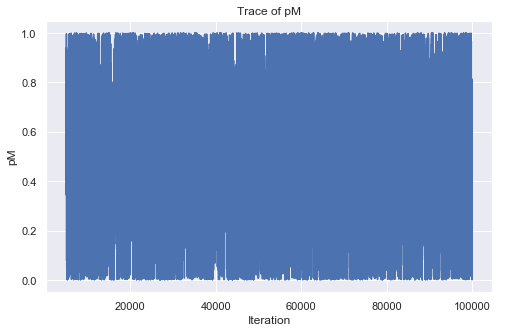

In [455]:
plt.plot(df_burnt[['pM']])
plt.title('Trace of pM')
plt.xlabel('Iteration')
plt.ylabel('pM')
plt.savefig(figDir + 'traceM_' + ext + '.png')

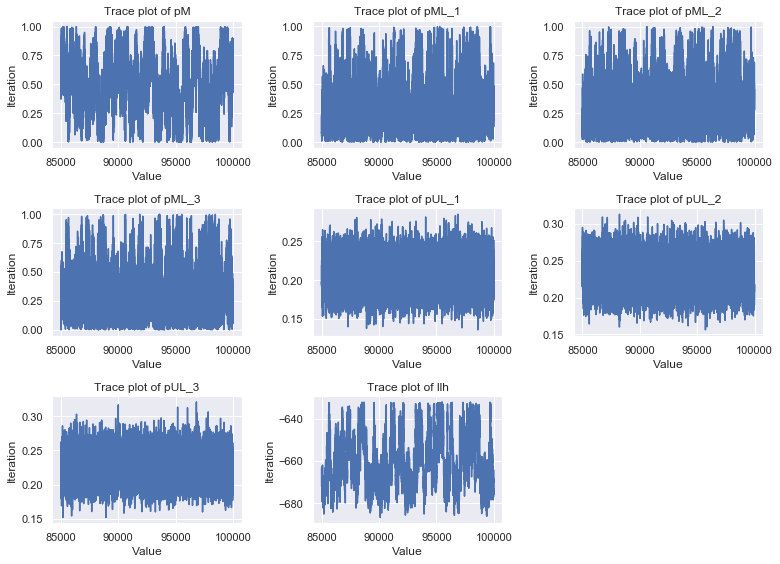

In [468]:
sns.set(rc={'figure.figsize':(11,8)})
from scipy.stats import beta
# data_beta = beta.rvs(1,1, size=100000)
# L=4
df_burnt = df_burnt[80000:df_burnt.shape[0]]
for (idx, i) in enumerate(df_burnt.columns):
    
    # Set up the plot
    ax = plt.subplot(3, 3, idx + 1)
    
#     string = 'pML_' + str(i+1)
    # Draw the plot
    sns.lineplot(x= df_burnt.index, y=df_burnt[i], data = df_burnt)
#     sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Trace plot of %s' % i)
    ax.set_xlabel('Value')
    ax.set_ylabel('Iteration')

plt.tight_layout()
plt.savefig(figDir + 'allTrace_' + ext + '.png')
plt.show()

### Histogram of params

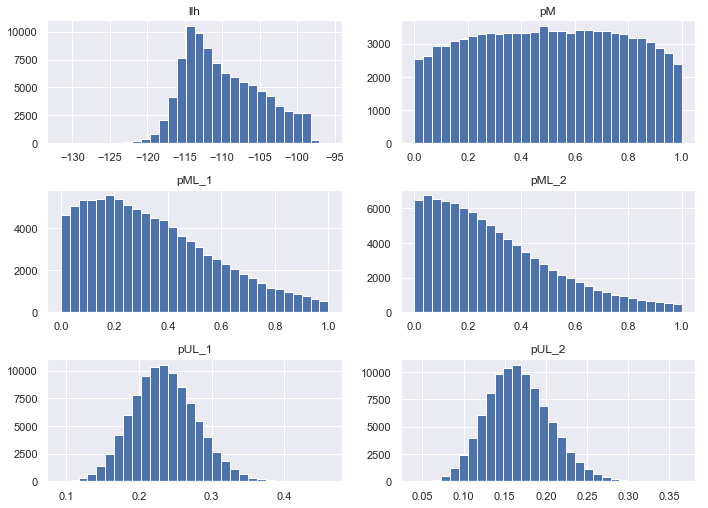

In [456]:
plt.rcParams['figure.figsize'] = (10, 14)
hist_plot = df_burnt.hist(bins=30,layout=(6,2))
plt.tight_layout()
plt.savefig(figDir + 'allParam_' + ext + '.png')

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


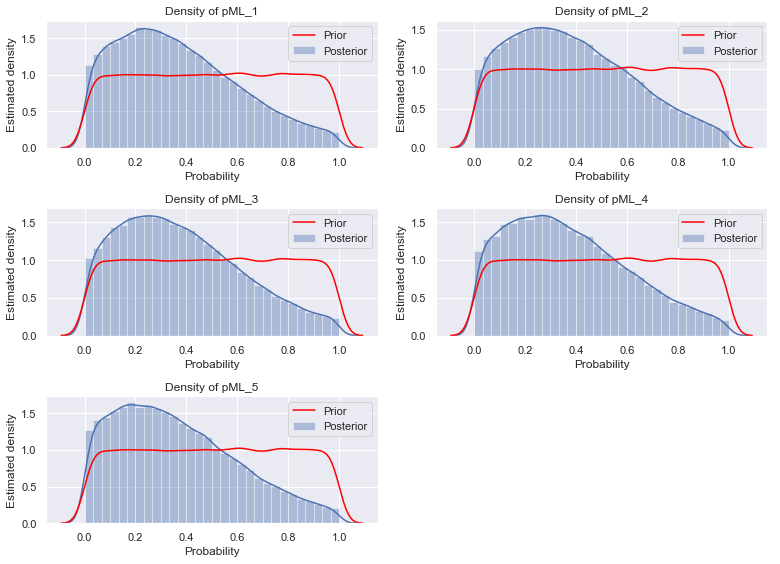

In [450]:
sns.set(rc={'figure.figsize':(11,8)})
from scipy.stats import beta
data_beta = beta.rvs(1,1, size=100000)
L = 5

for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    string = 'pML_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label = 'Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')

plt.tight_layout()
plt.savefig(figDir + 'pML_' + ext + '.png')
plt.show()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


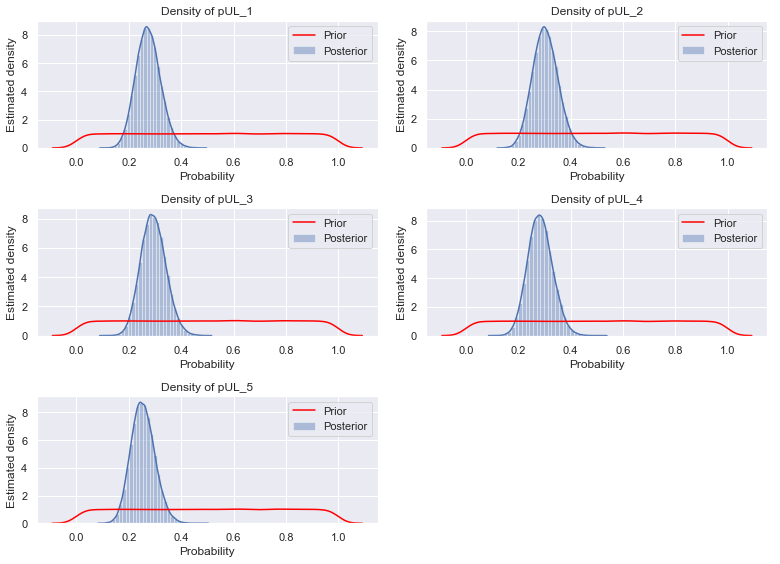

In [451]:
for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    string = 'pUL_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label='Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')
    
plt.tight_layout()
plt.savefig(figDir + 'pUL_' + ext + '.png')
# plt.show()

### Now the interesting part -- Z trace!

In [683]:
n1 = n2 = 10
Zcounts = make_counts(Zout_burnt)
z = pd.DataFrame(Zcounts)
burnIn = 50000

Zout = pd.read_csv(outputDir + 'Z_trace_' + ext + '.csv')
Zout=Zout.drop(['Unnamed: 0'], axis = 1)
Zout_burnt = Zout[burnIn:len(Zout)]

def make_counts(Zout):
    Zcounts = {}
    for i in Zout.columns:
        Zout[i] = [y if y < 10 else 99 for y in Zout[i]]
        Zcounts['x' + str(i)] = Zout[i].value_counts().to_dict()
    return Zcounts

Ztrue = pd.read_csv(Zdir + 'Ztrue_' + ext + '.csv')
Ztrue=Ztrue.drop(['Unnamed: 0'], axis = 1)
Ztrue = Ztrue.transpose()
Ztrue.values[0] = [i if i<10 else 99 for i in Ztrue.values[0]]
Ztrue.values[0]

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


array([ 4, 99,  7,  3,  0,  9,  5,  2,  1,  8])

In [684]:
Zgraph = pd.DataFrame(0, index = np.arange(n1), columns = z.columns)
for x in range(n2):
    Zgraph['x' + str(x)] = [10000 if Ztrue[x][0] == Zgraph['x' + str(x)].index[i] else 0 for i in range(Zgraph.shape[0])]

In [659]:
zTemp= z.melt()
t = np.append(np.arange(n1),99)
zTemp['new'] = np.tile(t,n2)

In [700]:
zTemp['trueCount'] = 0 
for i in np.unique(zTemp['variable']):
    print(Zgraph[i])
    zTemp.loc[zTemp['variable']==i, 'trueCount'] = Zgraph[i]

0        0
1        0
2        0
3        0
4    10000
5        0
6        0
7        0
8        0
9        0
Name: x0, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: x1, dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7    10000
8        0
9        0
Name: x2, dtype: int64
0        0
1        0
2        0
3    10000
4        0
5        0
6        0
7        0
8        0
9        0
Name: x3, dtype: int64
0    10000
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
Name: x4, dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9    10000
Name: x5, dtype: int64
0        0
1        0
2        0
3        0
4        0
5    10000
6        0
7        0
8        0
9        0
Name: x6, dtype: int64
0        0
1        0
2    10000
3        0
4        0
5        0
6        0
7        0
8        0
9        0

In [713]:
Zgraph

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,0,0,0,10000,0,0,0,0,0
1,0,0,0,0,0,0,0,0,10000,0
2,0,0,0,0,0,0,0,10000,0,0
3,0,0,0,10000,0,0,0,0,0,0
4,10000,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,10000,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,10000,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,10000
9,0,0,0,0,0,10000,0,0,0,0


In [714]:
Ztrue

,0,1,2,3,4,5,6,7,8,9
0,4,99,7,3,0,9,5,2,1,8


In [712]:
# zT = z.drop([99])
ZgraphT = Zgraph.drop([99])

ValueError: labels [99] not contained in axis

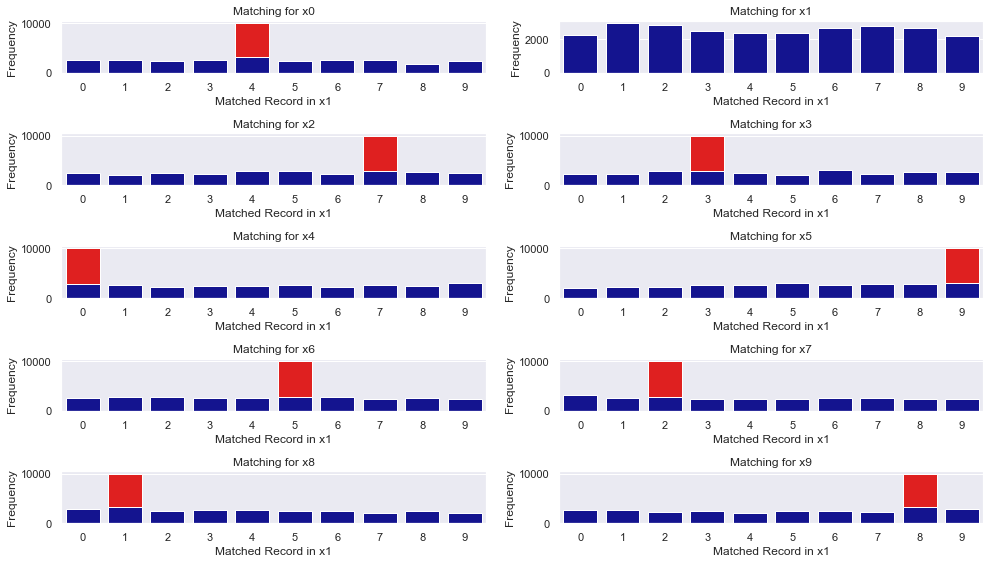

In [717]:
import matplotlib as mpl
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
n2 = n1= 10


for i in range(n2):
    # Set up the plot
    ax = plt.subplot(5, 2, i + 1)
    
    xVar = 'x' + str(i)
    # Draw the plot

    sns.barplot(x = Zgraph.index, y = xVar, data=Zgraph, color = "red")
    sns.barplot(x=zT.index, y=xVar, data = zT, color = '#0000A3')
    

    # Title and labels
    ax.set_title('Matching for %s' % xVar)
    ax.set_xlabel('Matched Record in x1')
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.savefig(figDir + 'Zmatches' + ext + '.png')
plt.show()

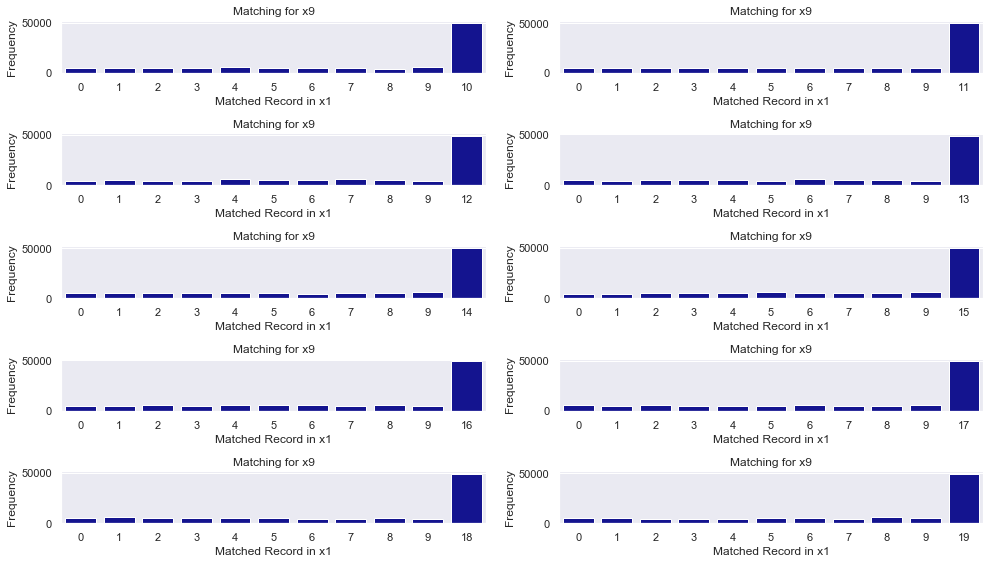

In [731]:
import matplotlib as mpl
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
n2 = n1= 10

for idx,i in enumerate(Zout_burnt.columns):
    # Set up the plot
    ax = plt.subplot(5, 2, idx + 1)
    
    # Draw the plot
    sns.countplot(Zout[i], color = '#0000A3')
#     sns.barplot(Ztrue[i], color = '#0000A3')
    # Title and labels
    ax.set_title('Matching for %s' % xVar)
    ax.set_xlabel('Matched Record in x1')
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.savefig(figDir + 'Zmatches' + ext + '.png')
plt.show()